# Segment credit card customers using K-Means in Python

## Dataset Features

The dataset includes the following features:

- **Customer_id**: Unique identifier for the customer holding the account.
- **Age**: Customer's age in years.
- **Gender**: Sex of the customer (`M`: Male, `F`: Female).
- **Dependent_count**: Number of dependents.
- **Education_level**: Customer's level of education (e.g., high school, college graduate, etc.).
- **Marital_status**: Customer's marital status (e.g., Married, Single, Divorced, Unknown).
- **Income_level**: Customer's level of income (e.g., Survival Income, Basic Needs Income, Significant Income, etc.).
- **Months_on_book**: Duration of customer relationship with the bank (in months).
- **Total_relationship_count**: Total number of products held by the customer.
- **Months_inactive_12_mon**: Number of months inactive in the last 12 months.
- **Contacts_count_12_mon**: Number of contacts in the last 12 months.
- **Credit_limit**: Credit limit on the credit card.
- **Total_trans_amount**: Total transaction amount in the last 12 months.
- **Total_trans_count**: Total transaction count in the last 12 months.
- **Avg_utilization_ratio**: Average card utilization ratio.

## Data Source

The original data was downloaded from [Kaggle](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data) on **26/05/2025**. It has been cleaned to match the guided project dataset as closely as possible.

For the guided project, the cleaned dataset is being used, accessible via another project: **credit_card_customers_data_cleaning.ipynb**.atio

In [23]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

In [24]:
# Load the dataset from a CSV file into a Pandas DataFrame
credit_card_df = pd.read_csv('customer_segmentation.csv')

# Display the first five rows of the DataFrame for a quick overview of the data
credit_card_df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,income_level,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,Discretionary Income,39,5,1,3,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,Survival Income,44,6,1,2,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,Significant Income,36,4,1,0,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,Survival Income,34,3,4,1,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,Discretionary Income,21,5,1,0,4716.0,816,28,0.000


In [25]:
# Display summary information about the DataFrame, including:
# - Column names and data types
# - Non-null counts for each column
# - Memory usage of the dataset

credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_level              10127 non-null  object 
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  contacts_count_12_mon     10127 non-null  int64  
 11  credit_limit              10127 non-null  float64
 12  total_trans_amount        10127 non-null  int64  
 13  total_trans_count         10127 non-null  int64  
 14  avg_ut

In [26]:
# Count the occurrences of each unique value in the 'marital_status' column
# This helps understand the distribution of marital status among customers

credit_card_df['marital_status'].value_counts()

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [27]:
# Count the occurrences of each unique value in the 'gender' column
# This helps analyze the distribution of male and female customers in the dataset

credit_card_df['gender'].value_counts()

gender
F    5358
M    4769
Name: count, dtype: int64

In [28]:
# Count the occurrences of each unique value in the 'education_level' column
# This provides insight into the distribution of customers based on their education level

credit_card_df['education_level'].value_counts()

education_level
Graduate         3687
High School      2349
Uneducated       1756
College          1192
Post-Graduate     617
Doctorate         526
Name: count, dtype: int64

In [29]:
# Count the occurrences of each unique value in the 'income_level' column
# This helps analyze the distribution of customers across different income levels

credit_card_df['income_level'].value_counts()

income_level
Survival Income         4381
Basic Needs Income      2038
Significant Income      1554
Discretionary Income    1417
Abundance Income         737
Name: count, dtype: int64

In [30]:
# Generate summary statistics for all numerical columns in the dataset
# Includes count, mean, standard deviation, min, max, and percentiles

credit_card_df.describe()

,customer_id,age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


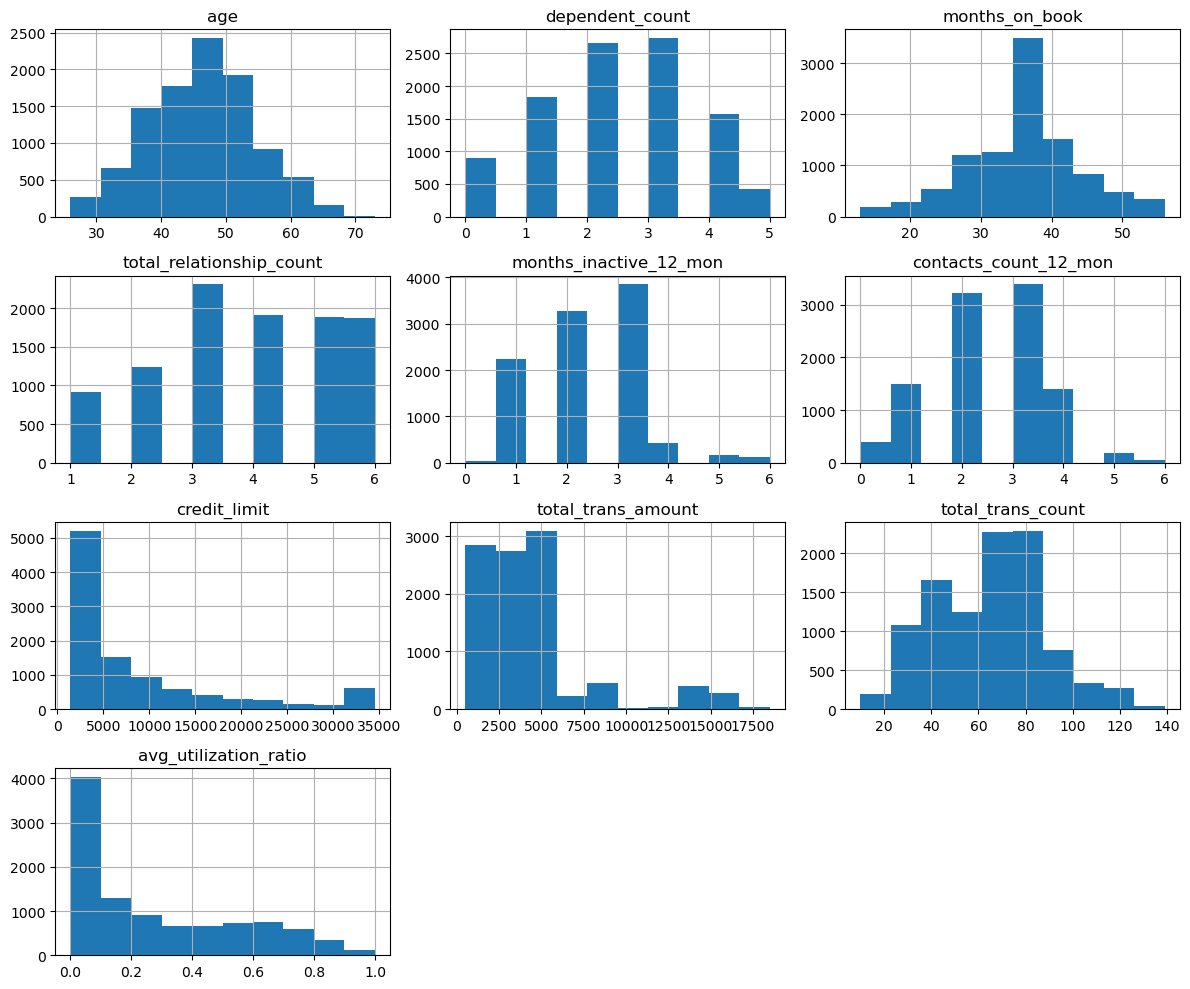

In [31]:
# Drop the 'customer_id' column as it's not needed for numerical analysis
# Generate histograms for all remaining numerical features in the dataset
credit_card_df.drop('customer_id', axis=1).hist(figsize=(12, 10))

# Adjust the layout to prevent overlapping plots and improve readability
plt.tight_layout()

# Display the histograms
plt.show()

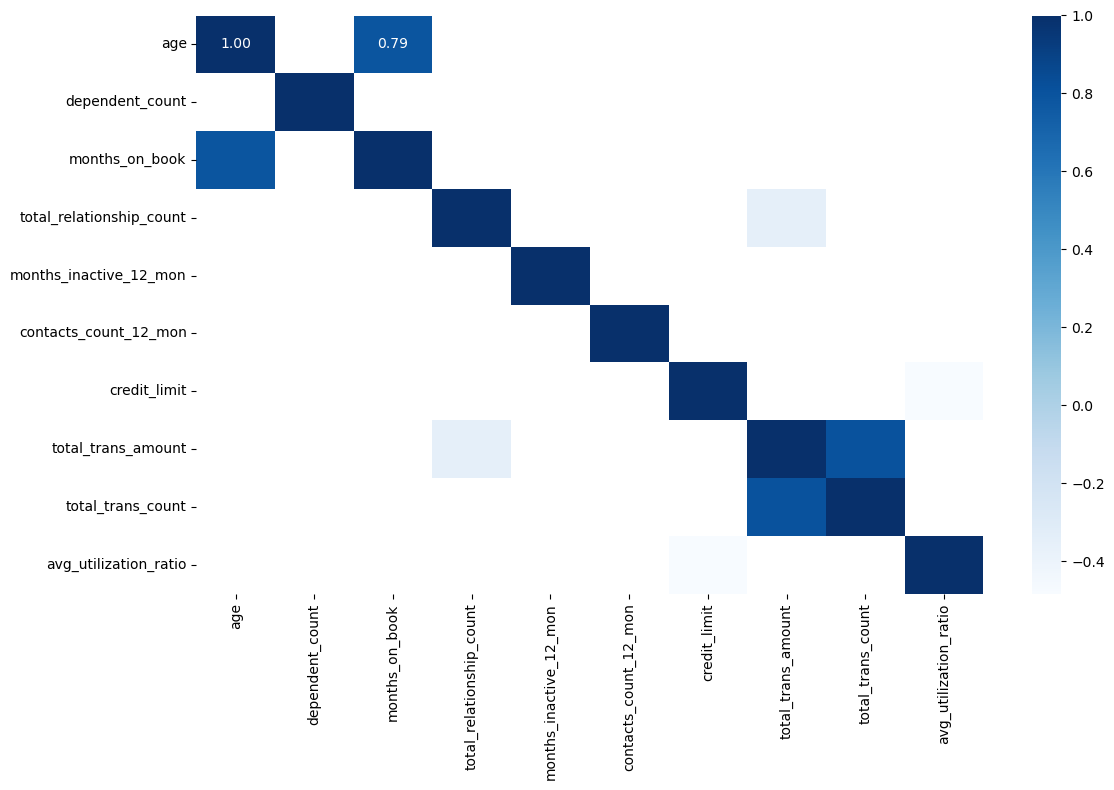

In [32]:
# Compute the correlation matrix for numerical columns, excluding 'customer_id'
correlations = credit_card_df.drop('customer_id', axis=1).corr(numeric_only=True)

# Filter correlations with absolute values greater than 0.3 (moderate correlations)
display_correlations = correlations[(correlations > 0.3) | (correlations < -0.3)]

# Create a mask to hide NaN values (non-significant correlations)
mask = display_correlations.isnull()

# Format correlation values for annotation, displaying only significant correlations
annot_labels = display_correlations.map(lambda x: f"{x:.2f}" if pd.notna(x) else '')

# Set up the figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(12,8))

# Create a heatmap to visualize strong correlations in the dataset
sns.heatmap(display_correlations, cmap="Blues", annot=annot_labels, fmt="", mask=mask, ax=ax)

# Improve layout to prevent overlap
plt.tight_layout()

# Display the heatmap
plt.show()

In [33]:
# Calculate the correlation matrix for numerical features, excluding 'customer_id'
correlations = credit_card_df.drop('customer_id', axis=1).corr(numeric_only=True)

# Filter correlations that have an absolute value greater than 0.3 (moderate correlations)
table_correlations = correlations[(correlations > 0.3) | (correlations < -0.3)]

# Display the filtered correlation matrix
table_correlations

,age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
age,1.000000,NaN,0.788912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependent_count,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
months_on_book,0.788912,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_relationship_count,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,-0.347229,NaN,NaN
months_inactive_12_mon,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
contacts_count_12_mon,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
credit_limit,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.482965
total_trans_amount,NaN,NaN,NaN,-0.347229,NaN,NaN,NaN,1.000000,0.807192,NaN
total_trans_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.807192,1.000000,NaN
avg_utilization_ratio,NaN,NaN,NaN,NaN,NaN,NaN,-0.482965,NaN,NaN,1.000000


In [34]:
# Create a copy of the original dataset to preserve the original data
customers_modif = credit_card_df.copy()

# Convert the 'gender' column into a binary format:
# - Assign 1 for male ('M')
# - Assign 0 for female ('F')
customers_modif['gender'] = credit_card_df['gender'].apply(lambda x: 1 if x == 'M' else 0)

# Display the first five rows of the modified dataset
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,income_level,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,Discretionary Income,39,5,1,3,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,Survival Income,44,6,1,2,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,Significant Income,36,4,1,0,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,Survival Income,34,3,4,1,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,Discretionary Income,21,5,1,0,4716.0,816,28,0.000


In [35]:
# Define a dictionary to map education levels to numerical values:
# - 'Uneducated' → 0
# - 'High School' → 1
# - 'College' → 2
# - 'Graduate' → 3
# - 'Post-Graduate' → 4
# - 'Doctorate' → 5
education_mapping = {'Uneducated': 0, 'High School': 1, 'College': 2,
                     'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5}

# Apply the mapping to convert the 'education_level' column to numerical values
customers_modif['education_level'] = customers_modif['education_level'].map(education_mapping)

# Display the first five rows of the modified dataset
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,income_level,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,Discretionary Income,39,5,1,3,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,Survival Income,44,6,1,2,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,Significant Income,36,4,1,0,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,Survival Income,34,3,4,1,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,Discretionary Income,21,5,1,0,4716.0,816,28,0.000


In [36]:
# Define a dictionary to map income levels to numerical values:
# - 'Survival Income' → 0
# - 'Basic Needs Income' → 1
# - 'Significant Income' → 2
# - 'Discretionary Income' → 3
# - 'Abundance Income' → 4
income_mapping = {'Survival Income': 0, 'Basic Needs Income': 1, 'Significant Income': 2,
                  'Discretionary Income': 3, 'Abundance Income': 4}

# Apply the mapping to convert the 'income_level' column to numerical values
customers_modif['income_level'] = customers_modif['income_level'].map(income_mapping)

# Display the first five rows of the modified dataset
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,income_level,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,3,39,5,1,3,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,0,44,6,1,2,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,2,36,4,1,0,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,0,34,3,4,1,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,3,21,5,1,0,4716.0,816,28,0.000


In [37]:
# Create dummy variables for the 'marital_status' column
# This converts categorical values into separate binary columns (one-hot encoding)
dummies = pd.get_dummies(customers_modif[['marital_status']])

# Concatenate the dummy variables with the original dataset
customers_modif = pd.concat([customers_modif, dummies], axis=1)

# Drop the original 'marital_status' column since it's now represented by dummy variables
customers_modif.drop(['marital_status'], axis=1, inplace=True)

# Display the DataFrame's structure, including column names, data types, and memory usage
print(customers_modif.info())

# Show the first five rows of the modified dataset for verification
customers_modif.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int64  
 5   income_level              10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   contacts_count_12_mon     10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
 14  marita

,customer_id,age,gender,dependent_count,education_level,income_level,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,3,39,5,1,3,12691.0,1144,42,0.061,False,True,False,False
1,818770008,49,0,5,3,0,44,6,1,2,8256.0,1291,33,0.105,False,False,True,False
2,713982108,51,1,3,3,2,36,4,1,0,3418.0,1887,20,0.000,False,True,False,False
3,769911858,40,0,4,1,0,34,3,4,1,3313.0,1171,20,0.760,False,False,False,True
4,709106358,40,1,3,0,3,21,5,1,0,4716.0,816,28,0.000,False,True,False,False


In [38]:
# Remove the 'customer_id' column, as it's a unique identifier and not needed for scaling
X = customers_modif.drop('customer_id', axis=1)

# Initialize the StandardScaler to normalize the numerical features
scaler = StandardScaler()

# Fit the scaler to the dataset (computes mean and standard deviation for scaling)
scaler.fit(X)

# Apply the scaler to transform the dataset into a standardized format
X_scaled = scaler.transform(X)

# Display the transformed dataset (now scaled)
X_scaled

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])

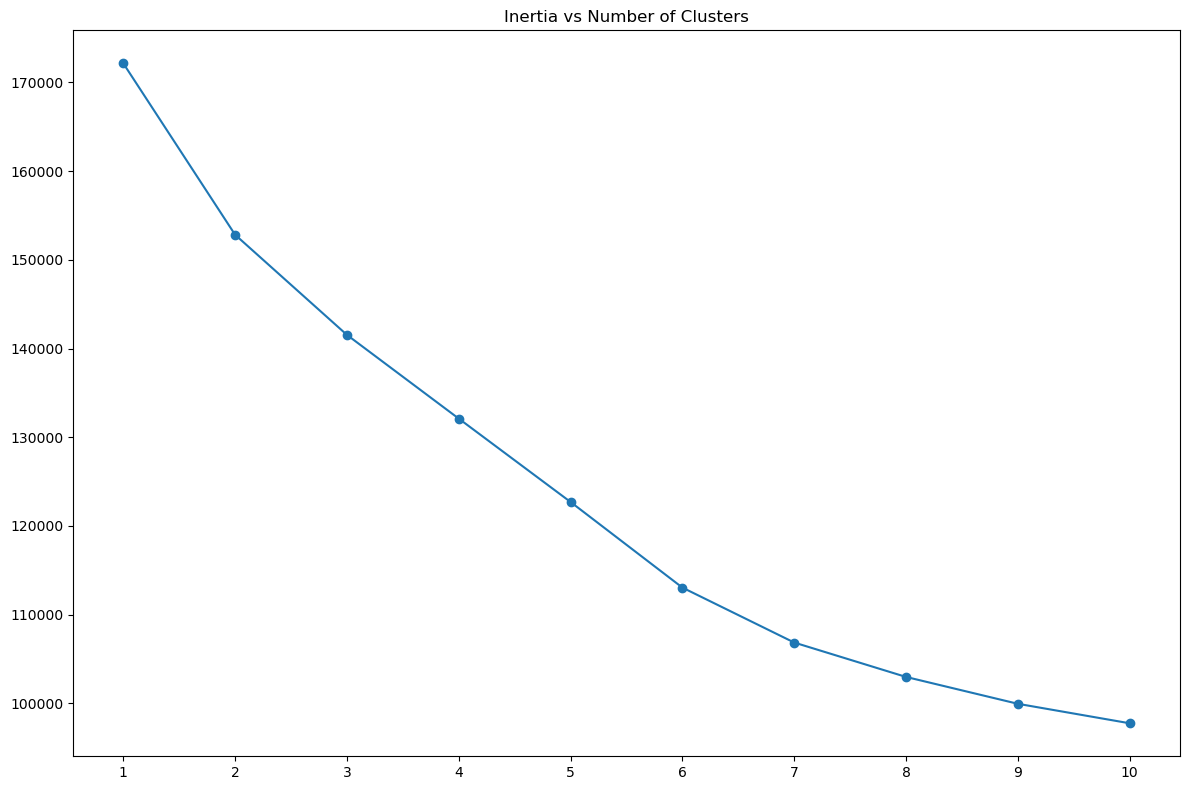

In [39]:
# Convert the scaled feature matrix into a Pandas DataFrame for easier handling
X = pd.DataFrame(X_scaled)

# Initialize an empty list to store inertia values for different cluster counts
inertias = []

# Loop through different values of k (number of clusters) from 1 to 10
for k in range(1, 11):
    # Initialize the KMeans model with k clusters and 10 different initializations
    model = KMeans(n_clusters=k, n_init=10)
    
    # Fit the model and predict cluster assignments for the dataset
    y = model.fit_predict(X)
    
    # Store the inertia (sum of squared distances from cluster centers)
    inertias.append(model.inertia_)

# Create a figure for the inertia plot
plt.figure(figsize=(12,8))

# Plot the inertia values against the number of clusters
plt.plot(range(1, 11), inertias, marker='o')

# Set the x-axis labels for clarity
plt.xticks(ticks=range(1, 11), labels=range(1, 11))

# Add a title to indicate the purpose of the plot
plt.title('Inertia vs Number of Clusters')

# Adjust layout for better visibility
plt.tight_layout()

# Display the plot
plt.show()

In [40]:
# Initialize the K-Means clustering model with 8 clusters and 10 different initializations
model = KMeans(n_clusters=8, n_init=10, random_state=42)

# Fit the model to the scaled dataset and predict cluster assignments for each customer
y = model.fit_predict(X_scaled)

# Display the predicted cluster labels for all data points
y

array([5, 4, 5, ..., 1, 3, 1], dtype=int32)

In [41]:
# Assign the cluster labels to the original dataset
# Since K-Means clustering assigns labels starting from 0, we add 1 to start clusters from 1
credit_card_df['cluster'] = y + 1

# Display the first five rows of the dataset with the newly assigned cluster labels
credit_card_df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,income_level,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,cluster
0,768805383,45,M,3,High School,Married,Discretionary Income,39,5,1,3,12691.0,1144,42,0.061,6
1,818770008,49,F,5,Graduate,Single,Survival Income,44,6,1,2,8256.0,1291,33,0.105,5
2,713982108,51,M,3,Graduate,Married,Significant Income,36,4,1,0,3418.0,1887,20,0.000,6
3,769911858,40,F,4,High School,Unknown,Survival Income,34,3,4,1,3313.0,1171,20,0.760,4
4,709106358,40,M,3,Uneducated,Married,Discretionary Income,21,5,1,0,4716.0,816,28,0.000,6


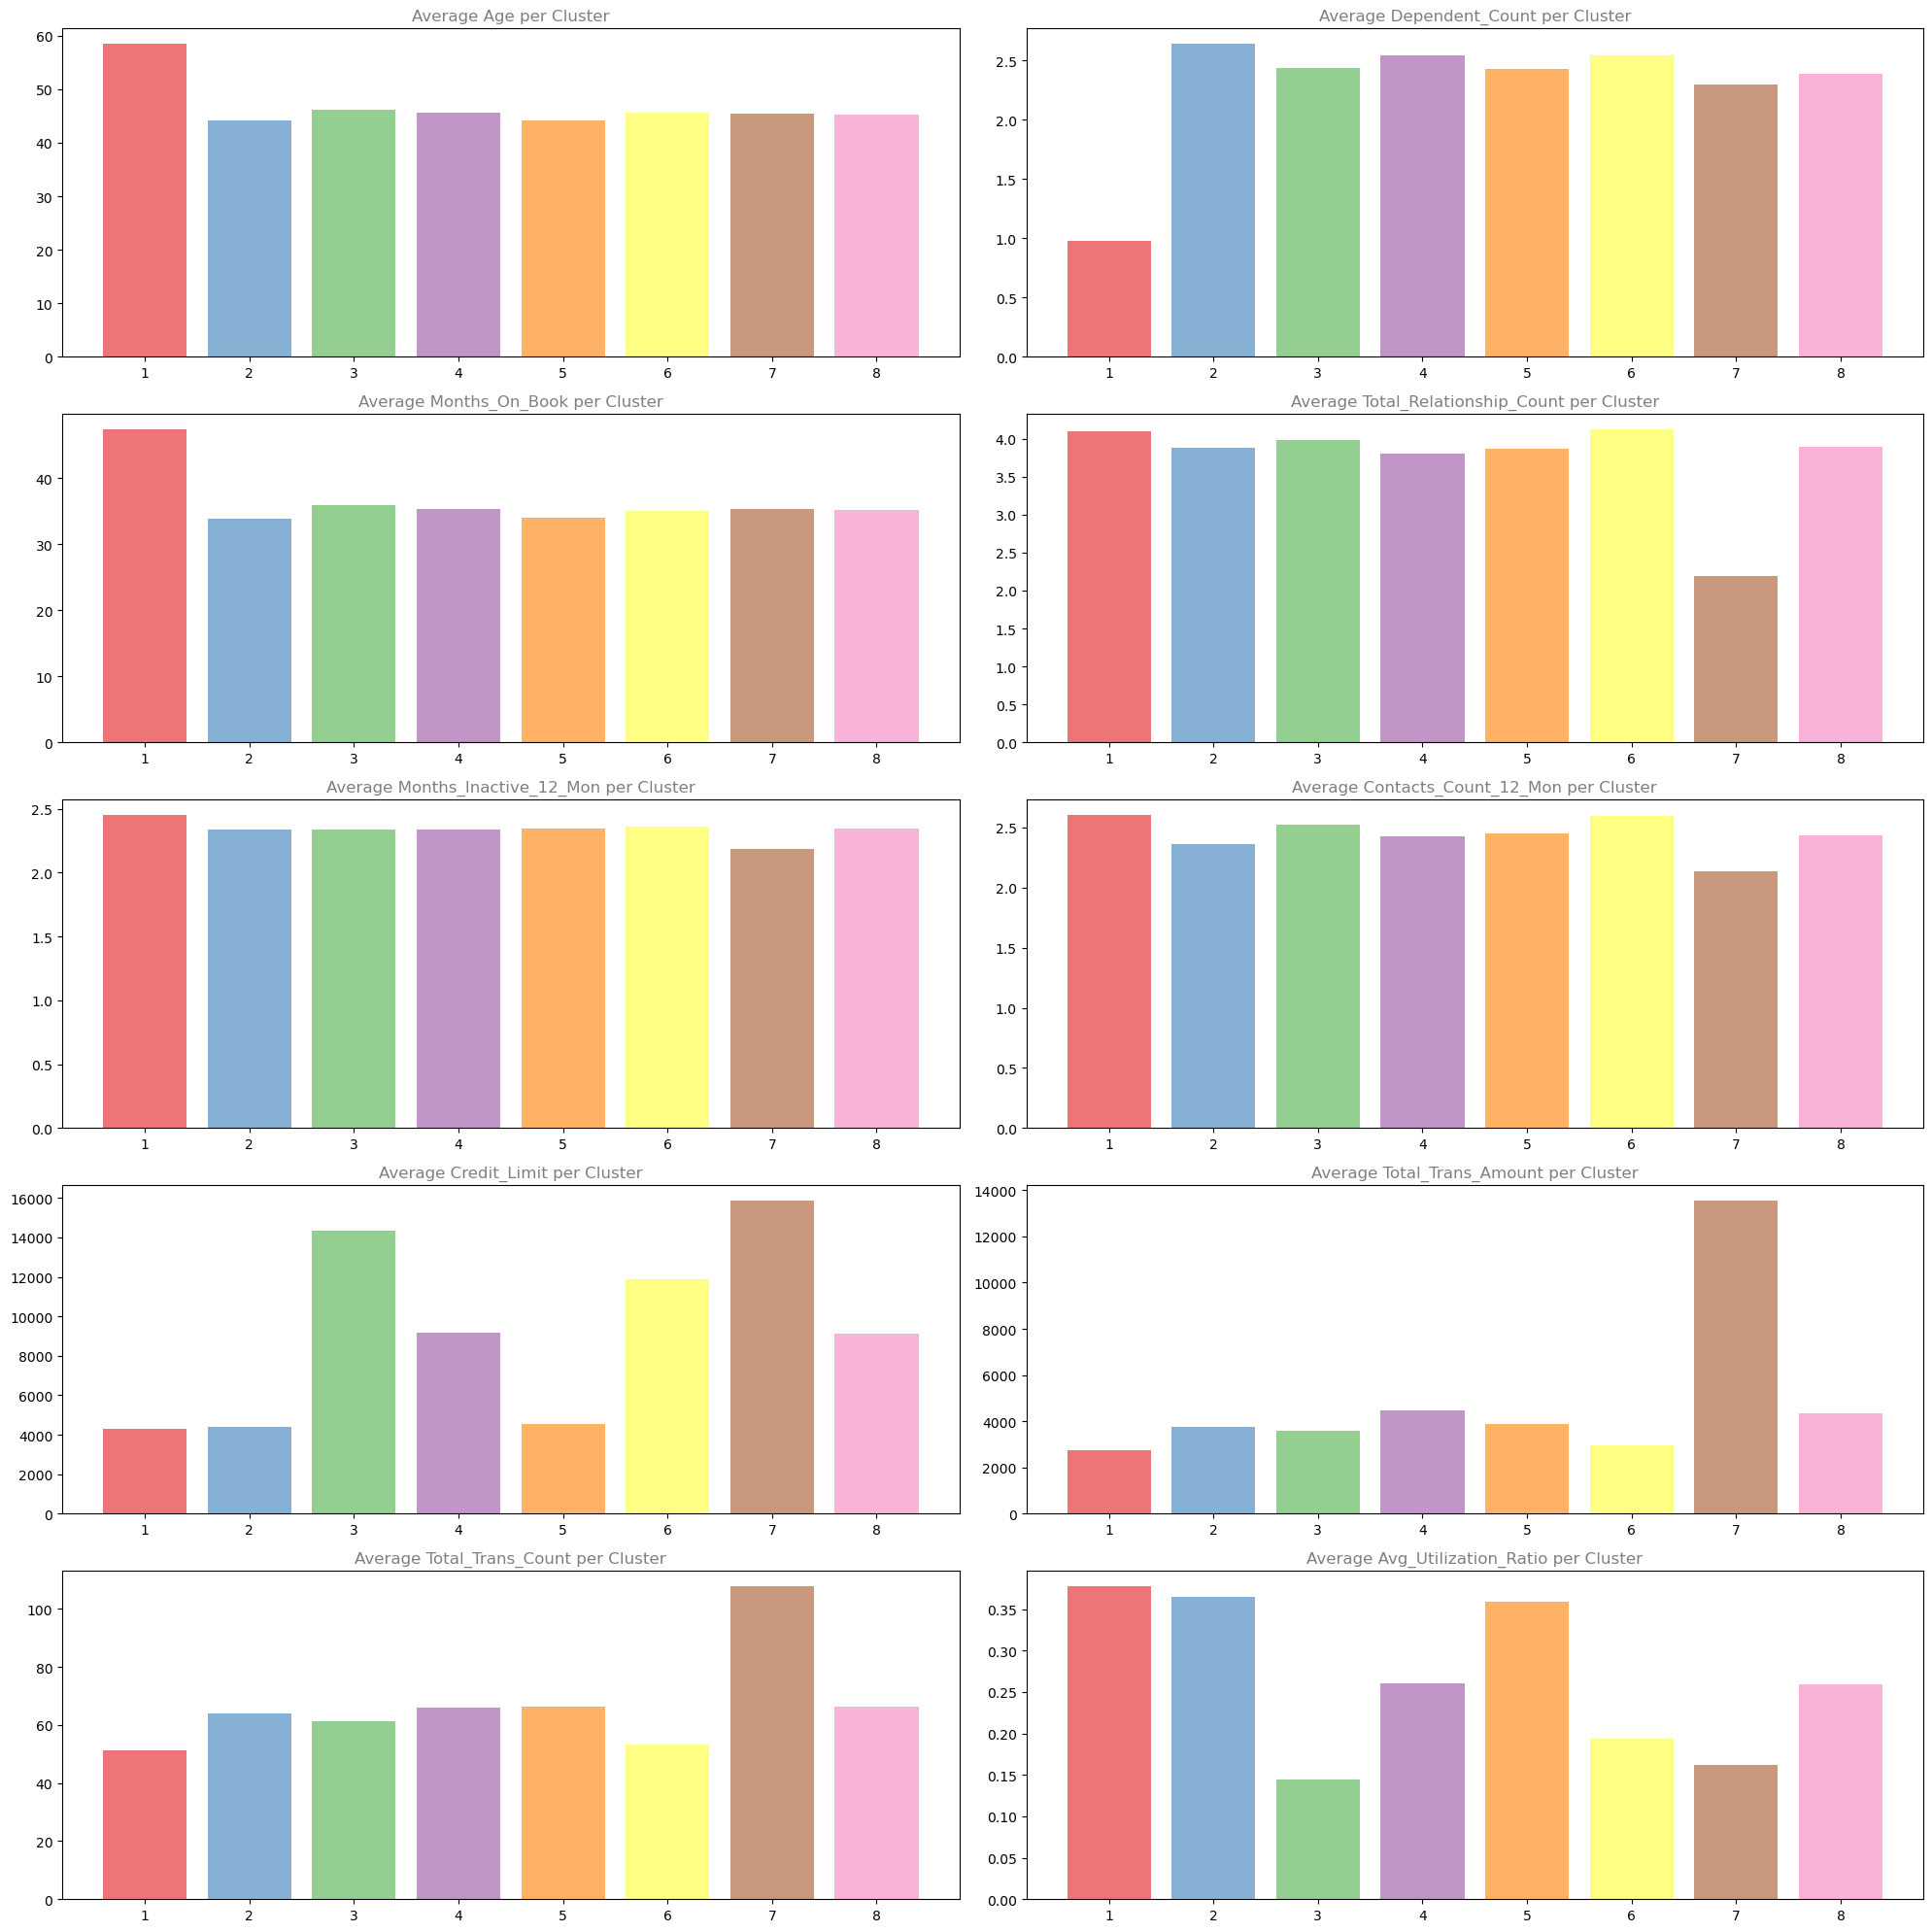

In [42]:
# Select only numerical columns from the dataset, excluding 'customer_id' and 'cluster'
numeric_columns = credit_card_df.select_dtypes(include=np.number).drop(
    ['customer_id', 'cluster'], axis=1).columns

# Create a figure with larger dimensions to fit multiple subplots
fig = plt.figure(figsize=(20, 20))

# Loop through the selected numerical columns and create bar plots for each
for i, column in enumerate(numeric_columns):
    # Compute the average values of the column for each cluster
    df_plot = credit_card_df.groupby('cluster')[column].mean()

    # Add a subplot at the appropriate position
    ax = fig.add_subplot(5, 2, i+1)

    # Create a bar plot showing the average value per cluster
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)

    # Set the title dynamically for each plot based on the column name
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)

    # Remove gridlines from the x-axis for cleaner visualization
    ax.xaxis.grid(False)

# Adjust the layout to prevent overlapping plots
plt.tight_layout()

# Display the plots
plt.show()

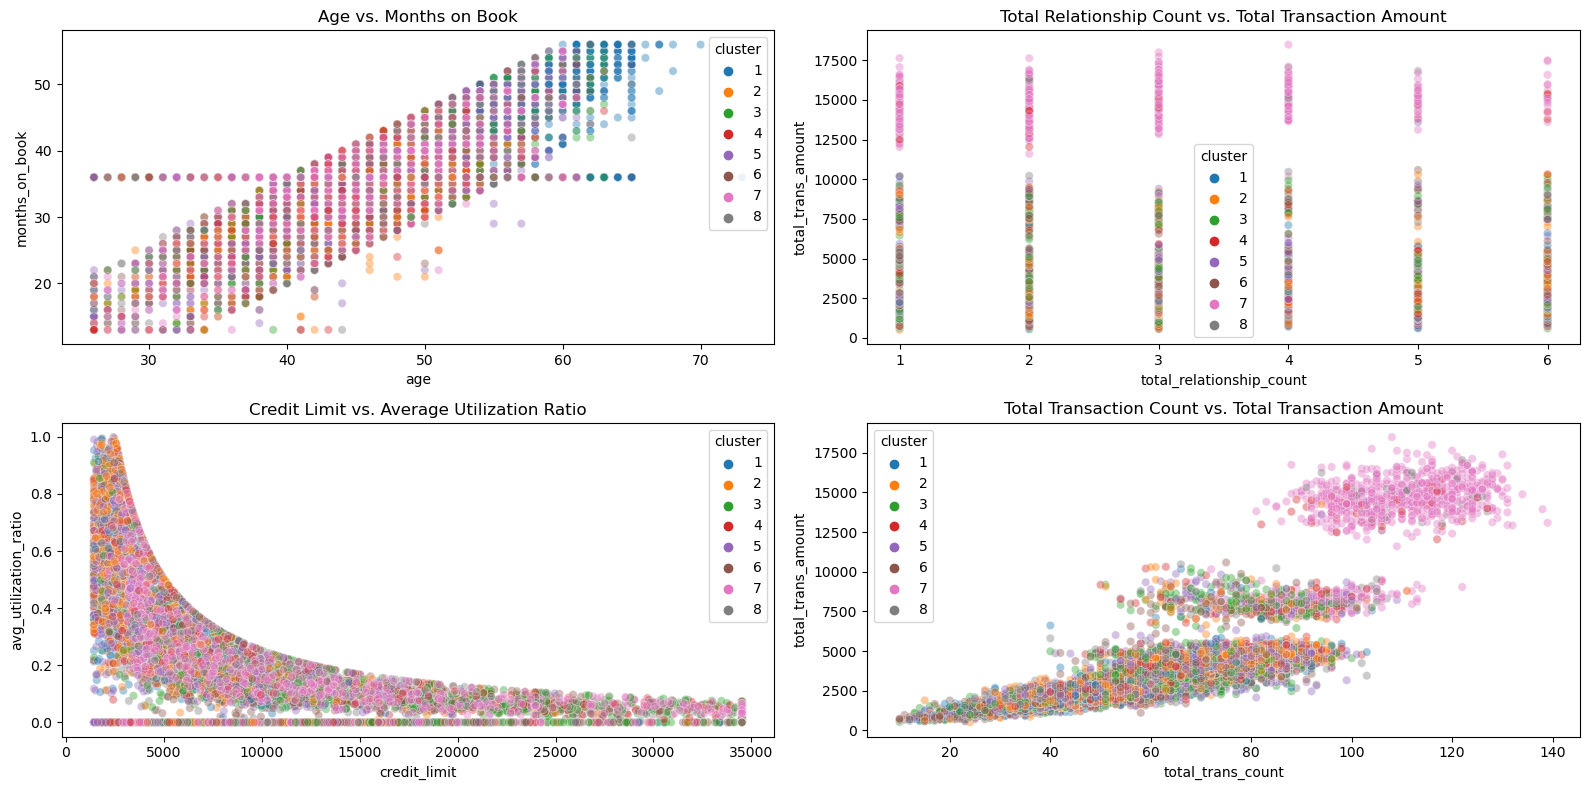

In [43]:
# Create a 2x2 grid of subplots with a defined figure size
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))

# These features are strongly correlated based on previous analysis

# Scatter plot of Age vs. Months on Book, colored by cluster
sns.scatterplot(x='age', y='months_on_book', hue='cluster', data=credit_card_df, 
                palette='tab10', alpha=0.4, ax=ax1)
ax1.set_title('Age vs. Months on Book')

# Scatter plot of Total Relationship Count vs. Total Transaction Amount, colored by cluster
# Helps analyze transaction behavior based on relationship level
sns.scatterplot(x='total_relationship_count', y='total_trans_amount', hue='cluster', 
                data=credit_card_df, palette='tab10', alpha=0.4, ax=ax2)
ax2.set_title('Total Relationship Count vs. Total Transaction Amount')

# Scatter plot of Credit Limit vs. Average Utilization Ratio, colored by cluster
# Shows how credit availability affects usage behavior
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='cluster', 
                data=credit_card_df, palette='tab10', alpha=0.4, ax=ax3)
ax3.set_title('Credit Limit vs. Average Utilization Ratio')

# Scatter plot of Total Transaction Count vs. Total Transaction Amount, colored by cluster
# Highlights spending habits and transactional volume
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='cluster', 
                data=credit_card_df, palette='tab10', alpha=0.4, ax=ax4)
ax4.set_title('Total Transaction Count vs. Total Transaction Amount')

# Improve layout for better readability and spacing
plt.tight_layout()

# Display the plots
plt.show()

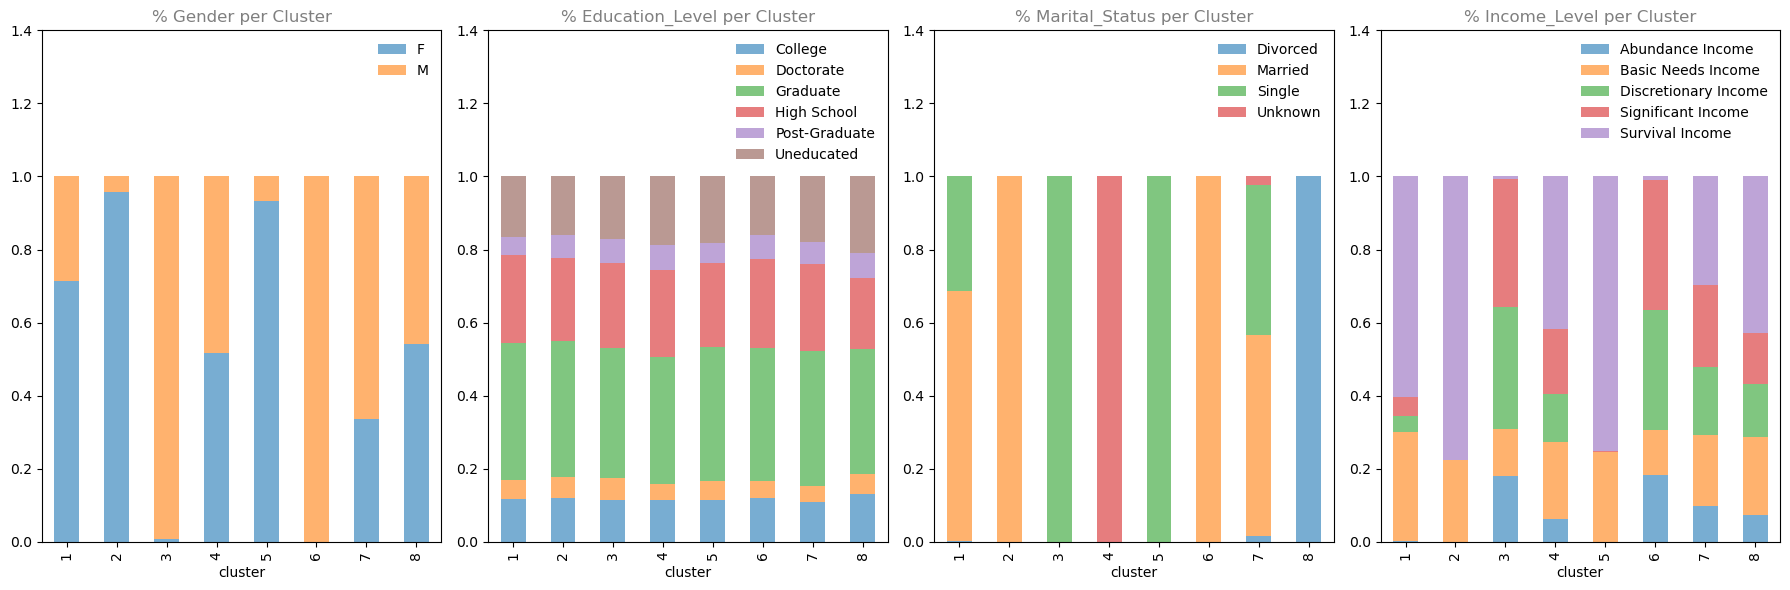

In [44]:
# Select categorical columns from the dataset (non-numeric features)
cat_columns = credit_card_df.select_dtypes(include=['object'])

# Create a figure with larger dimensions to fit multiple subplots
fig = plt.figure(figsize=(18, 6))

# Loop through each categorical column to create bar charts for cluster-wise distributions
for i, col in enumerate(cat_columns):
    # Compute the percentage distribution of each categorical variable across clusters
    plot_df = pd.crosstab(index=credit_card_df['cluster'], columns=credit_card_df[col], 
                          values=credit_card_df[col], aggfunc='size', normalize='index')
    
    # Create subplots for visualization
    ax = fig.add_subplot(1, 4, i+1)

    # Generate stacked bar plots showing category distributions per cluster
    plot_df.plot.bar(stacked=True, ax=ax, alpha =0.6)
    
    # Set title dynamically based on the column name
    ax.set_title(f'% {col.title()} per Cluster', alpha = 0.5)

    # Adjust the y-axis limits for better visibility
    ax.set_ylim(0, 1.4)

    # Remove border around legend for a cleaner look
    ax.legend(frameon=False)

    # Remove gridlines on the x-axis for clarity
    ax.xaxis.grid(False)

    #Define percentage labels for better readability
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    
    #ax.set_yticklabels(labels) # Uncomment if custom y-tick labels are needed

# Adjust layout to prevent overlapping plots
plt.tight_layout()

# Display the visualizations
plt.show()

# Credit Card Customer Segmentation

## Overview
The dataset was segmented into 8 customer groups using K-Means clustering, based on demographic and financial features. Each cluster showcases customers with common characteristics in terms of income, credit usage, marital status, and engagement levels. These insights support data-driven strategies for customer management, retention, and tailored services.

---

## Cluster Descriptions

### **Cluster 1: Older Loyal Females with Low Credit Access**
- **Demographics**: ~70% Female; ~70% Married, ~30% Single.
- **Financial Profile**:
  - ~60% on Survival Income, ~30% on Basic Needs Income.
  - Oldest average age (~60), lowest average dependents (~1).
  - Highest months on book (suggesting loyalty).
  - Low credit limit (~4,000), highest utilization (~35%).
  - Slightly elevated inactivity (marginally).
- **Insights**: Loyal and aging customers with financial limits—potential focus for retention.

---

### **Cluster 2: Married Low-Income Women with Dependents**
- **Demographics**: ~95% Female, Married.
- **Financial Profile**:
  - ~75% on Survival Income.
  - Highest dependents count (above 2.5).
  - Low credit limit (~4,000).
  - High utilization ratio (above 35%).
- **Insights**: Financially vulnerable customers with larger household burdens.

---

### **Cluster 3: Single High-Income Males**
- **Demographics**: 99% Male, Single.
- **Financial Profile**:
  - ~90% above Basic Needs Income.
  - High credit limit (~14,000).
  - Lowest utilization ratio (under 15%).
- **Insights**: Wealthier customers who use credit conservatively—ideal for premium offerings.

---

### **Cluster 4: Mixed Gender, Financially Constrained**
- **Demographics**: Balanced male/female mix, unknown marital status.
- **Financial Profile**:
  - ~40% on Survival Income.
  - Average credit limit and utilization ratio (~25%).
- **Insights**: Demographically ambiguous group with average financial standing.

---

### **Cluster 5: Single, Credit-Reliant Women**
- **Demographics**: ~95% Female, Single.
- **Financial Profile**:
  - ~70% on Survival Income.
  - Low credit limit (~4,000).
  - High utilization ratio (~35%).
- **Insights**: Credit-reliant segment—likely in need of financial support services.

---

### **Cluster 6: High-Income Married Males with General Profile**
- **Demographics**: Male, Married.
- **Financial Profile**:
  - ~90% above Basic Needs Income.
  - Other features align with the overall dataset average.
- **Insights**: Stable segment but lacks distinctive traits—limited value for targeted strategies.

---

### **Cluster 7: High-Spend, High-Credit Males with Low Product Use**
- **Demographics**: ~65% Male; mix of Married and Single.
- **Financial Profile**:
  - Wide income distribution.
  - Lowest product and contact counts.
  - Marginally lowest inactivity.
  - Highest credit limit (~16,000).
  - Low utilization ratio (~ 15%).
  - Highest transaction count and amount by a significant margin.
- **Insights**: Financially strong but under-engaged—opportunity for cross-selling and product upselling.

---

### **Cluster 8: Divorced, Average Credit Usage**
- **Demographics**: Balanced mix of male and female, divorced.
- **Financial Profile**:
  - Just over 40% on Survival Income.
  - Average credit limit and utilization ratio (~25%).
- **Insights**: Moderately stretched group with average credit behavior.

---

## Key Takeaways
- **Clusters 3 and 7** represent high-value customers with strong financial behavior and low credit risk.
- **Clusters 1, 2, and 5** suggest financially constrained customers who may benefit from support-oriented products.
- **Cluster 1** shows promise for loyalty-focused campaigns due to long tenure.
- **Cluster 6** resembles the general population and may contribute less to differentiated strategy.